In [19]:
import camb
import fgivenx
from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt

import camb_demo as cd
import camb_funcs as cf
import numpy as np
import matplotlib.pyplot as plt

Importing Packages
Using CAMB 1.0.9 installed at /home/ttlaz123/.local/lib/python3.5/site-packages/camb


In [9]:
lmax = 2000
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
ns = 0.8
As = 1.24e-9
kp=1/20
pars.InitPower.set_params(ns=ns, As=As)
#pars.WantTensors=False
pars.set_accuracy(lSampleBoost=50)
pars.set_for_lmax(lmax=lmax-40) # idk why it's offset by 40
results = camb.get_results(pars)
print('getting powers')
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
print('getting transfer function data')
pars.set_for_lmax(lmax=lmax-150) #idk why by the lmax is offset by 150
data = camb.get_transfer_functions(pars)
print('getting transfer mat')
transfer = data.get_cmb_transfer_data()
ks = transfer.q
pk = [As*(k/kp)**(ns-1) for k in ks]
pk = pars.scalar_power(ks)
norm_pk = [pk[i]/ks[i] for i in range(len(ks))]
spectrum_type=1
if(spectrum_type < 3):
    trans_squared = np.square(transfer.delta_p_l_k[spectrum_type])

    integral = trans_squared.dot(norm_pk)

    p = 1
    if(spectrum_type== 1 or spectrum_type ==2):
        p=3
if(spectrum_type== 3):
    trans_squared = np.multiply(transfer.delta_p_l_k[0], transfer.delta_p_l_k[1])

    integral = trans_squared.dot(norm_pk)
    p=2

cl = np.array([integral[i] * ((i) * (i+1))**p
                for i in range(len(integral))])


getting powers
getting transfer function data
getting transfer mat
dict_keys(['tensor', 'lens_potential', 'lensed_scalar', 'unlensed_scalar', 'total', 'unlensed_total'])


/home/ttlaz123/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


dict_keys(['tensor', 'lens_potential', 'lensed_scalar', 'unlensed_scalar', 'total', 'unlensed_total'])


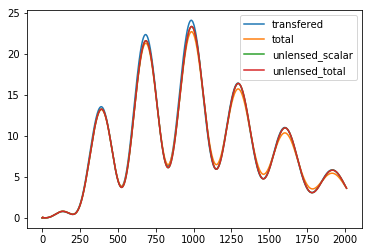

In [12]:
 %matplotlib inline
plt.plot(cl*2e9, label = 'transfered')

ind = spectrum_type
total_powers_T = powers['lensed_scalar'][:,ind]
print(powers.keys())
#plt.plot((powers['unlensed_total'][:,ind]-powers['unlensed_scalar'][:,ind])[1:], label='total')


plt.plot(powers['total'][:,ind], label='total')
plt.plot(powers['unlensed_scalar'][:,ind], label='unlensed_scalar')
plt.plot(powers['unlensed_total'][:,ind], label='unlensed_total')
#plt.plot(powers['lensed_scalar'][:,ind], label='lensed_scalar')
#plt.plot(powers['tensor'][:,ind], label='tensor')
#plt.plot(powers['lens_potential'][:,ind], label='lens_potential')

plt.legend()
plt.show()

In [77]:

spectrum_type=0
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_results(pars)
cf.global_var['results'] = results
powers = results.get_lensed_scalar_cls(CMB_unit='muK')
cf.global_var['measured'] = powers[:, spectrum_type]
cls=cf.get_cls_from_pk(0.96, 2e-9)


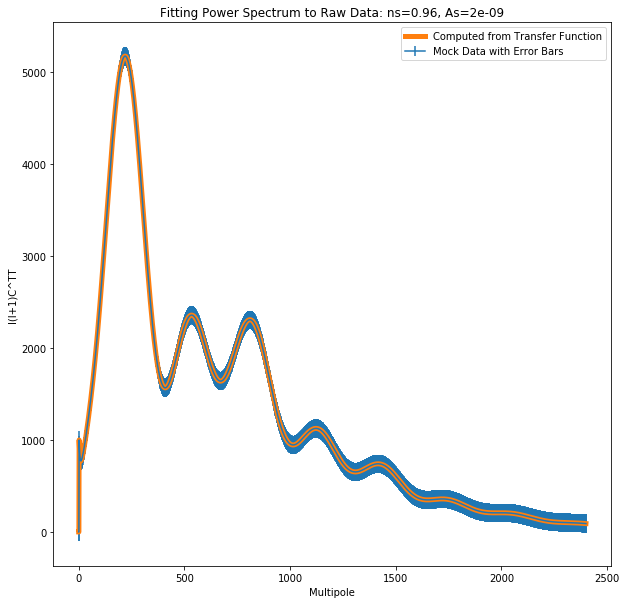

In [41]:
ns=0.96
As=2e-9
cls2=cf.get_cls_from_pk(ns, As)
plt.figure(figsize=(10,10))
plt.errorbar(range(len(cls[:,0])),cls[:, 0], 100, label='Mock Data with Error Bars')
plt.plot(cls2[:,0], linewidth=5, label='Computed from Transfer Function')
plt.title('Fitting Power Spectrum to Raw Data: ns=' + str(ns) + ', As=' + str(As))
plt.xlabel('Multipole')
plt.ylabel('l(l+1)C^TT')
plt.legend()
plt.show()

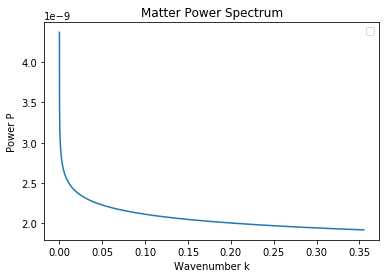

In [100]:
logks_list = [-6,2]
logps_list = [-19.1,-20.5]

logspline = cf.construct_logspline(transfer.q, logks_list, logps_list)
spline = cf.construct_spline(transfer.q, logks_list, logps_list)
cls2 = cf.get_cls_from_spline(logks_list, logps_list)
plt.plot(transfer.q,spline)
plt.title('Matter Power Spectrum')
plt.xlabel('Wavenumber k')
plt.ylabel('Power P')
plt.legend()
plt.show()

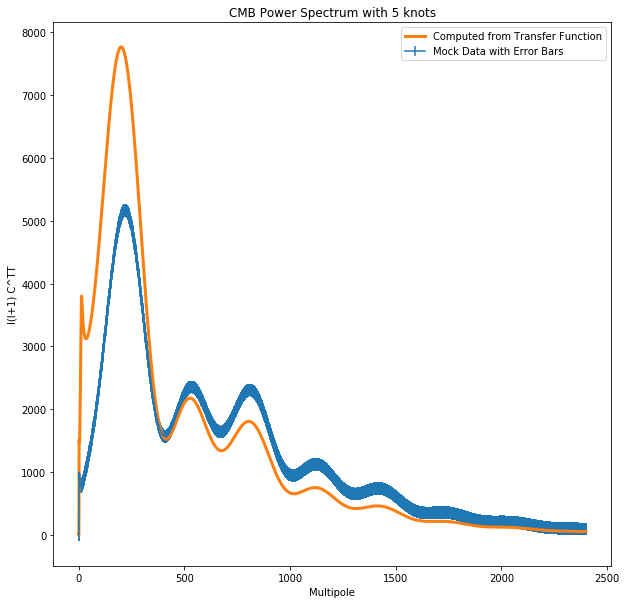

In [169]:
logks_list1 = [-6,-4,-3,-1, 0,2]
logps_list1 = [-19.1, -25, -18, -20.5, -21,-21]

logks_list2 = [-6,-5,-3.2,-2, -1,2]
logps_list2 = [-19.1, -25, -18, -20.5, -21,-21]

logks_list3 = [-6,-2,-1.4,-0.4, 0,2]
logps_list3 = [-19.1, -25, -18, -20.5, -21,-21]

logks_list4 = [-6,-5.5,-4.9,-4, 0,2]
logps_list4 = [-19.1, -25, -18, -20.5, -21,-21]

logks_list5 = [-6, -5.2, -1.8, -1.2, -0.3,2]
logps_list5 = [2, 2.1, 1.35, 1.3, 1.4,1.4]
def random_loglists(krange, prange, num):
    logks_list = []
    logps_list = []
    for i in range(num):
        pass
        
    
lists_listsk = [logks_list1, logks_list2,logks_list3,logks_list4]

lists_listsp = [logps_list1, logps_list2,logps_list3,logps_list4]

    
lists_listsk = [logks_list1, logks_list5]

lists_listsp = [logps_list1, [x-21.35 for x in logps_list5]]
logsplines = []
cls_list = []
for i in range(len(lists_listsk)):
    logks_list = lists_listsk[i]
    logps_list = lists_listsp[i]
    logsplines.append(cf.construct_logspline(transfer.q, logks_list, logps_list))
    cls_list.append(cf.get_cls_from_spline(logks_list, logps_list))
c = cls_list[0]
plt.figure(figsize=(10,10))
plt.errorbar(range(len(cls[:,0])),cls[:, 0], 100, label='Mock Data with Error Bars')
plt.plot(c[:,0], linewidth=3, label='Computed from Transfer Function')
plt.title('CMB Power Spectrum with 5 knots')
plt.xlabel('Multipole')
plt.ylabel('l(l+1) C^TT')
plt.legend()
plt.show()

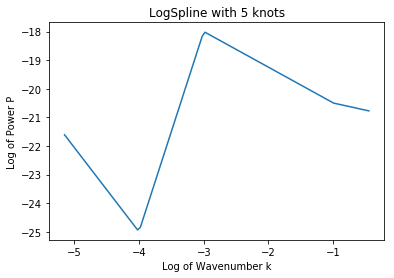

In [168]:
count = 0
for logspline in logsplines:
    count +=1
plt.plot(np.log10(transfer.q),logsplines[0], label='Spline ' + str(count))
plt.title('LogSpline with 5 knots')
plt.xlabel('Log of Wavenumber k')
plt.ylabel('Log of Power P')
#plt.legend()
plt.show()

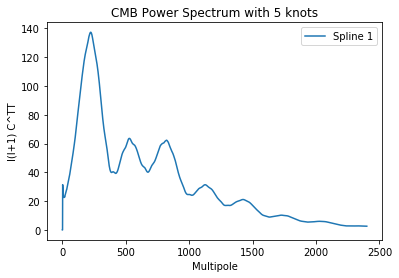

In [143]:
count = 0
for c in cls_list:
    count +=1
    plt.plot(c[:,0], label='Spline ' + str(count))
plt.title('CMB Power Spectrum with 5 knots')
plt.xlabel('Multipole')
plt.ylabel('l(l+1) C^TT')
plt.legend()
plt.show()

In [107]:

def plot_splines(logks_list, logps_list):
    logspline = cf.construct_logspline(transfer.q, logks_list, logps_list)
    spline = cf.construct_spline(transfer.q, logks_list, logps_list)
    cls2 = cf.get_cls_from_spline(logks_list, logps_list)
    
    
    
    '''
    plt.figure(figsize=(10,10))
    plt.errorbar(range(len(cls[:,0])),cls[:, 0], 100, label='Mock Data with Error Bars')
    plt.plot(cls2[:,0], linewidth=3, label='Computed from Transfer Function')
    plt.title('Spline with 3 knots')
    plt.xlabel('Log of Wavenumber k')
    plt.ylabel('Log of Power P')
    plt.legend()
    plt.show()
    
    plt.plot(transfer.q,spline)
    plt.title('Spline with 5 knots')
    plt.xlabel('Wavenumber k')
    plt.ylabel('Power P')
    plt.legend()
    plt.show()
    '''

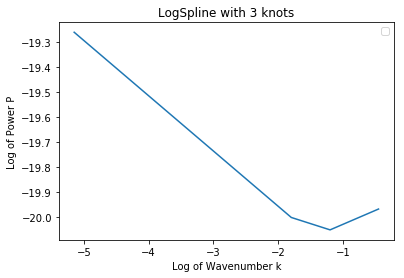

In [157]:
plt.plot(np.log10(transfer.q),logspline)
plt.title('LogSpline with 3 knots')
plt.xlabel('Log of Wavenumber k')
plt.ylabel('Log of Power P')
plt.legend()
plt.show()

showing plot


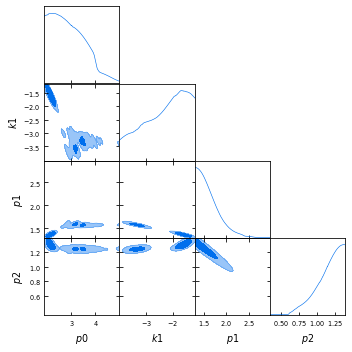

In [155]:
num_knots = 3
variables, priors = cf.get_priors_and_variables(num_knots)
cf.plot_info(variables = variables,file_root='out3_tt/3knots_tt')

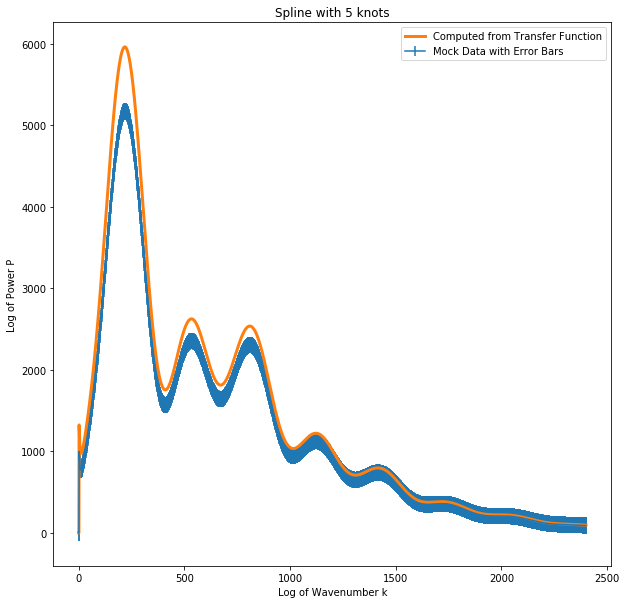

In [161]:
plt.figure(figsize=(10,10))
plt.errorbar(range(len(cls[:,0])),cls[:, 0], 100, label='Mock Data with Error Bars')
plt.plot(cls2[:,0], linewidth=3, label='Computed from Transfer Function')
plt.title('Spline with 5 knots')
plt.xlabel('Log of Wavenumber k')
plt.ylabel('Log of Power P')
plt.legend()
plt.show()

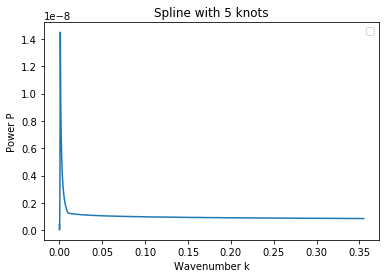